In [266]:
import numpy as np
import matplotlib.pyplot as plt

# Задание 1
## Гаусс-Ньютон - реализация

In [267]:
class GaussNewton:
    def __init__(self, func, eps, max_iterations):
        self.func = func
        self.eps = eps
        self.max_iterations = max_iterations
        self.X = None
        self.Y = None
        self.B0 = None

    def fit(self, X, Y, B0):
        self.X = X
        self.Y = Y
        self.B = B0

        error_prev = np.inf
        final_iterations = 0
        for iteration in range(self.max_iterations):
            diff = self.calculateDiff(self.B)
            J = self.calculateJacobian(self.B)
            self.B -= self.pseudoInverse(J) @ diff
            error = np.sqrt(np.sum(diff**2))

            print(f"Iteration: {iteration}, error: {error}")

            error_diff = np.abs(error_prev - error)
            if error_diff < self.eps:
                return self.B

            error_prev = error
            final_iterations = iteration

        return self.B, final_iterations

    def calculateDiff(self, B):
        Y_pred = self.func(self.X, B)
        return Y_pred - self.Y

    def calculateJacobian(self, B0, step = 1e-6):
        Y0 = self.calculateDiff(B0)
        J = []
        for i, parameter in enumerate(B0):
            B = B0.copy()
            B[i] += step
            Y = self.calculateDiff(B)
            derivative = (Y - Y0) / step
            J.append(derivative)
        J = np.array(J).T

        return J

    def pseudoInverse(self, X):
        return np.linalg.inv(X.T @ X) @ X.T

    def fitFunction(self):
        return self.func(self.X, self.B)

In [268]:
# while True:
#     iterations += 1
#     j1 = -(X / (B0[1] + X))
#     j2 = (B0[0] * X) / (B0[1] + X)**2
#     J[:,0] = j1
#     J[:,1] = j2
#
#     diff = Y - (B0[0] * X) / (B0[1] + X)
#     t1 = np.linalg.inv(np.dot(J.T, J))
#     t2 = np.dot(t1, J.T)
#     t3 = np.dot(t2, diff)
#
#     B1 = B0 - t3
#     t4 = abs(B1 - B0)
#     if max(t4) <= eps:
#         break
#     B0 = B1
#
# c1 = float('{:.4f}'.format(B0[0]))
# c2 = float('{:.4f}'.format(B0[1]))
# print(c1, c2)

In [269]:
def runGaussNewton(N = 10, eps = 1e-15, randCoeff = 0.2, max_iterations=1000):
    def func(X, B):
        return (B[0] + B[1] * X) / (X**2 + B[1]) + np.sin(X)

    def generateStartingValues():
        X = np.linspace(1, N, N)
        B = np.random.rand(2)
        Y = func(X, B) + randCoeff * np.random.rand(N)
        return X, B, Y

    X, B, Y = generateStartingValues()
    B0 = [1, 1]

    gauss_newton = GaussNewton(func, eps, max_iterations)
    Bf, iterations = gauss_newton.fit(X, Y, B0)
    fit = gauss_newton.fitFunction()
    print(X)
    print(fit)

    plt.figure(1, figsize=(6, 4), dpi=120)
    plt.scatter(X, Y, color='red')
    plt.plot(X, fit, color='Blue')
    plt.xlabel("X")
    plt.ylabel("Y")
    plt.title(f"iterations: {iterations}")
    plt.show()

### Гаусс-Ньютон - запуск

Iteration: 0, error: 0.8093244115180595
Iteration: 1, error: 0.20439478305429423
Iteration: 2, error: 0.1277932172613522
Iteration: 3, error: 0.12768939063493223
Iteration: 4, error: 0.12768938581299874
Iteration: 5, error: 0.12768938581107836
Iteration: 6, error: 0.12768938581107503
Iteration: 7, error: 0.12768938581107506
[ 1.  2.  3.  4.  5.  6.  7.  8.  9. 10.]
[ 1.21547488  1.15619652  0.31571507 -0.62317408 -0.85106506 -0.18912544
  0.73457343  1.0573485   0.47261052 -0.48954584]


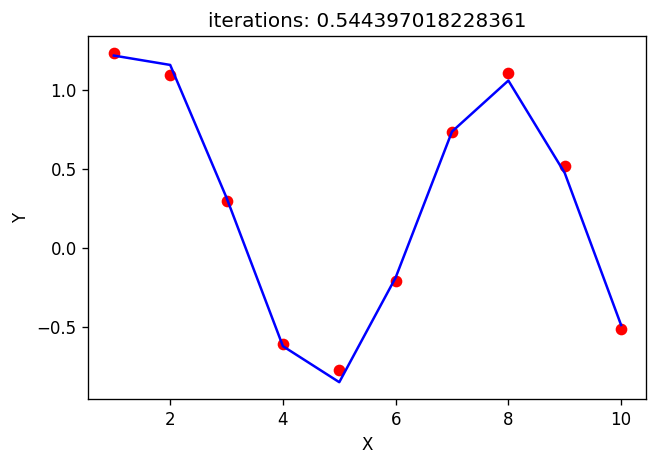

In [270]:
runGaussNewton()